In [152]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [2]:
# Import sqlite3 module into
# this program as sq
import sqlite3 as sq
 
# Import pandas module into
# this program as pd
import pandas as pd
   
# Create a connection object,
# Make a new db if not exist already 
# and connect it, if exist then connect.
connection = sq.connect('information.db')
 
# Create a cursor object
curs = connection.cursor()
 
# Run create table sql query
curs.execute("create table if not exists studentInfo" +
             " (player_index VARCHAR(10) PRIMARY KEY, player_name VARCHAR(50), team_abbreviation VARCHAR(5), age INT, player_height FLOAT,  player_weight FLOAT,college VARCHAR(50),country VARCHAR(15), draft_year INT, draft_round INT, draft_number INT, gp INT, pts FLOAT, reb FLOAT, ast FLOAT, net_rating FLOAT, oreb_pct FLOAT, dreb_pct FLOAT, usg_pct FLOAT, ts_pct FLOAT, ast_pct FLOAT, season VARCHAR(10))")
 
# Load CSV data into Pandas DataFrame
student = pd.read_csv('dataset.csv')
 
# Write the data to a sqlite db table
student.to_sql('studentInfo', connection, if_exists='replace', index=False)
   
# Run select sql query
curs.execute('select * from studentInfo')
curs.execute('''DELETE FROM studentInfo WHERE player_name IS NULL
  AND team_abbreviation IS NULL
  AND age IS NULL
  AND player_height IS NULL 
  AND player_weight IS NULL 
  AND college IS NULL
  AND country IS NULL
  AND draft_year IS NULL
  AND draft_round IS NULL
  AND draft_number IS NULL
  AND gp IS NULL
  AND pts IS NULL
  AND reb IS NULL
  AND ast IS NULL
  AND net_rating IS NULL
  AND oreb_pct IS NULL
  AND dreb_pct IS NULL
  AND usg_pct IS NULL
  AND ts_pct IS NULL
  AND ast_pct IS NULL
  AND season IS NULL;''')

db1 = pd.read_sql('''SELECT player_name, AVG(player_height) 
  AS average_height, AVG(player_weight) AS average_weight FROM studentInfo GROUP BY player_name;''', 
                  connection)

db2 = pd.read_sql('''SELECT team_abbreviation, AVG(pts) AS average_pts, 
  AVG(reb) AS average_reb,AVG(ast) AS average_ast,
  AVG(player_height) AS average_player_height,
  AVG(player_weight) AS average_player_weight 
  FROM studentInfo
  WHERE season = '2010-11'GROUP BY team_abbreviation;
  ''', connection)

db3 = pd.read_sql('''SELECT country, SUM(pts) AS total_points, 
  COUNT(*) AS total_games FROM studentInfo GROUP BY country;
  ''', connection)
 
# Fetch all records
# as list of tuples
records = curs.fetchall()
 
# Display result 
#for row in records:
    # show row
#    print(row)
     
# Close connection to SQLite database
connection.close()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
dataset = db1

In [5]:
dataset.head()

,player_name,average_height,average_weight
0,A.C. Green,205.74,102.058200
1,A.J. Bramlett,208.28,102.965384
2,A.J. Guyton,185.42,81.646560
3,AJ Hammons,213.36,117.933920
4,AJ Price,187.96,84.821704


In [6]:
dataset.describe()

,average_height,average_weight
count,2463.000000,2463.000000
mean,200.163490,99.409815
std,9.082196,12.375046
min,160.020000,60.327736
25%,193.040000,90.718400
50%,200.660000,98.883056
75%,207.010000,108.689283
max,231.140000,163.293120


In [7]:
dataset.isna().sum()

player_name       0
average_height    0
average_weight    0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player_name     2463 non-null   object 
 1   average_height  2463 non-null   float64
 2   average_weight  2463 non-null   float64
dtypes: float64(2), object(1)
memory usage: 57.9+ KB


In [9]:
X = dataset.iloc[:, 1].values
X.shape

(2463,)

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in db1.columns:
    if dataset[col].dtypes=='object':
        dataset[col]=le.fit_transform(dataset[col])

In [11]:
y = dataset.iloc[:, 2].values
y1 = np.where(dataset['average_weight']>97, 1, 0)
y.shape

(2463,)

In [12]:
y_players = dataset.iloc[:, 0].values

In [13]:
X_players = dataset.iloc[:, [1,2]].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 0)

In [15]:
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

In [16]:
y_test.shape

(863,)

In [17]:
X_test.shape

(863, 1)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.6671872275129584

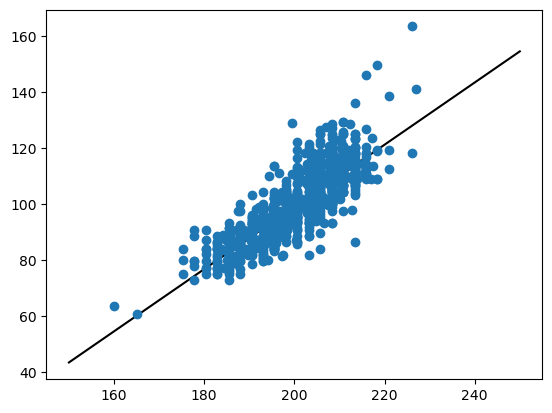

In [19]:
xfit=np.linspace(150,250)
yfit=model.predict(xfit[:, np.newaxis])
plt.plot(xfit,yfit, color="black")
plt.plot(X_test,y_test, 'o')

#plt.plot(np.vstack([X_test,X_test]), np.vstack([y_test, model.predict(X_test)]), color="red");

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.35, random_state = 0)

In [21]:
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

In [22]:
#берем логистическую регрессию
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
#получаем метрику accuracy для train и test
print(classifier.score(X_test, y_test))

0.8412514484356894


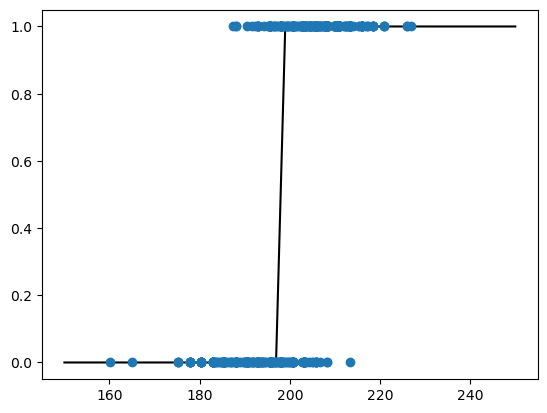

In [23]:
xfit=np.linspace(150,250)
yfit=classifier.predict(xfit[:, np.newaxis])
plt.plot(xfit,yfit, color="black")
plt.plot(X_test,y_test, 'o')

In [24]:
from sklearn.svm import SVC
svc1 = SVC(gamma=1,kernel="rbf", C=0.1)
svc1.fit(X_train, y_train)

SVC(C=0.1, gamma=1)

In [25]:
svc1.score(X_test,y_test)

0.8389339513325609

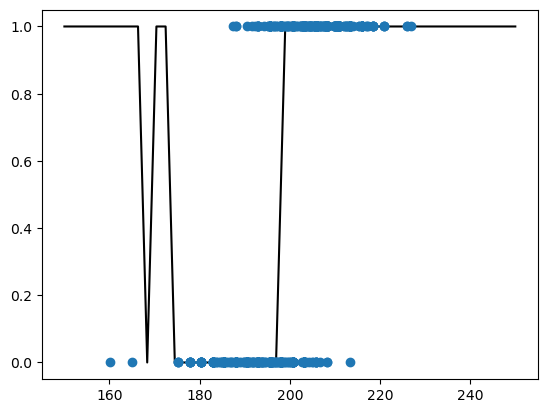

In [26]:
xfit=np.linspace(150,250)
yfit=svc1.predict(xfit[:, np.newaxis])
plt.plot(xfit,yfit, color="black")
plt.plot(X_test,y_test, 'o')

In [27]:
dataset = db2

In [28]:
dataset.head()

,team_abbreviation,average_pts,average_reb,average_ast,average_player_height,average_player_weight
0,ATL,7.892857,3.435714,1.828571,203.2000,105.298143
1,BOS,8.437500,3.525000,2.000000,200.9775,103.674121
2,CHA,6.668750,3.175000,1.512500,201.6125,102.001501
3,CHI,8.300000,3.928571,1.828571,200.6600,99.207050
4,CLE,8.506250,3.875000,1.787500,200.9775,102.426744


In [29]:
dataset.describe()

,average_pts,average_reb,average_ast,average_player_height,average_player_weight
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,8.242503,3.564686,1.775043,201.213148,101.636730
std,0.705245,0.279750,0.171156,1.238058,2.346399
min,6.668750,3.070588,1.441176,198.966667,97.629008
25%,7.741458,3.345000,1.663854,200.194333,99.893378
50%,8.286667,3.580000,1.773958,200.998667,101.231062
75%,8.565848,3.735882,1.923214,202.241394,103.659947
max,9.766667,4.133333,2.057143,203.369333,106.282275


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team_abbreviation      30 non-null     object 
 1   average_pts            30 non-null     float64
 2   average_reb            30 non-null     float64
 3   average_ast            30 non-null     float64
 4   average_player_height  30 non-null     float64
 5   average_player_weight  30 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.5+ KB


In [31]:
# инициализируем X без столбца (data feature) 
X = dataset.iloc[:,1:].values
X.shape

(30, 5)

In [32]:
# инициализируем Y как целевую функцию
y = dataset.iloc[:,0].values
y.shape

(30,)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [37]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier,plot_tree
import pydotplus

# определяем дерево решений
dt_classifier = DecisionTreeClassifier(criterion = 'gini')

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
# функция для отрисовки результатов
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

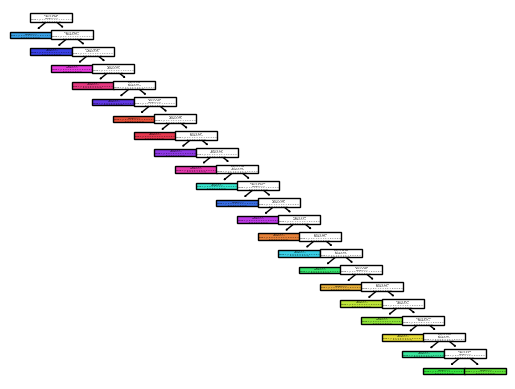

In [39]:
# рисуем как есть
plt.figure()
plot_tree(dt_classifier, filled=True)
plt.show()

# адаптируем под вывод
tree_graph_to_png(dt_classifier, feature_names=['average_pts', 'average_reb', 'average_ast', 'average_player_height', 'average_player_weight'],
                  png_file_to_save='gini.png')

In [40]:
dataset = db3

In [41]:
dataset.head()

,country,total_points,total_games
0,Angola,8.7,3
1,Argentina,530.6,65
2,Australia,805.3,89
3,Austria,43.2,6
4,Bahamas,163.3,11


In [42]:
dataset.describe()

,total_points,total_games
count,82.000000,82.000000
mean,1226.414634,150.060976
std,9275.983469,1136.108338
min,0.000000,1.000000
25%,13.550000,3.250000
50%,82.400000,12.000000
75%,260.700000,32.750000
max,84158.400000,10308.000000


In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       82 non-null     object 
 1   total_points  82 non-null     float64
 2   total_games   82 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


In [44]:
# инициализируем X без столбца (data feature) 
X = dataset.iloc[:,1:].values
X.shape

(82, 2)

In [45]:
# инициализируем Y как целевую функцию
y = dataset.iloc[:,0].values
y.shape

(82,)

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       82 non-null     object 
 1   total_points  82 non-null     float64
 2   total_games   82 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [48]:
# определяем дерево решений
dt_classifier = DecisionTreeClassifier(criterion = 'entropy')

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

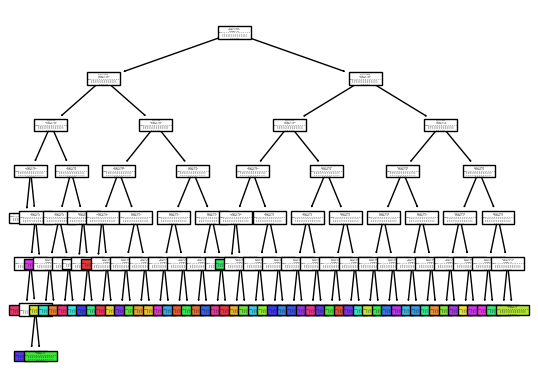

In [49]:
plt.figure()
plot_tree(dt_classifier, filled=True)
plt.show()

# адаптируем под вывод
tree_graph_to_png(dt_classifier, feature_names=['total_points','total_games'],
                  png_file_to_save='entropy.png')